<a href="https://colab.research.google.com/github/krisnamughni24/Colab/blob/main/Audio_and_Speech_Emotion_Recognition_(ASER)_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio and Speech Emotion Recognition (ASER)

Krisna Mughni Jiwandaru

19/444057/TK/49253

Natural Language Processing

As human beings speech is amongst the most natural way to express ourselves. We depend so much on it that we recognize its importance when resorting to other communication forms like emails and text messages where we often use emojis to express the emotions associated with the messages. As emotions play a vital role in communication, the detection and analysis of the same is of vital importance in today’s digital world of remote communication. Emotion detection is a challenging task, because emotions are subjective. There is no common consensus on how to measure or categorize them. We define a **Speech Emotion Recognition (SER)** system as a collection of methodologies that process and classify speech signals to detect emotions embedded in them. Such a system can find use in a wide variety of application areas like interactive voice based-assistant or caller-agent conversation analysis.

in this project, I tried to run SER with 4 datasets available.We hope this is the first step towards a more functional system. One of them is the artificial production of music.

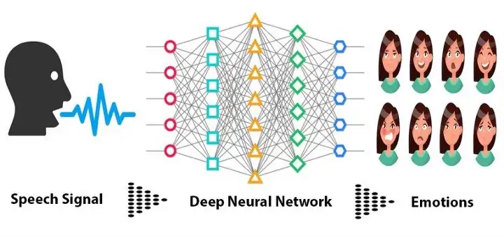

## Import All Libraries and Warnings

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

import librosa
import librosa.display
import IPython

import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

import re
import os
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Input Dataset

In [ ]:
Savee_Path = "/content/gdrive/MyDrive/Colab Notebooks/surrey"
Crema_Path = "/content/gdrive/MyDrive/Colab Notebooks/crema"
Ravdess_Path = "/content/gdrive/MyDrive/Colab Notebooks/ravdess"
Tess_Path = "/content/gdrive/MyDrive/Colab Notebooks/toronto"

### About Dataset

Savee_Path \\ Surrey \\ http://kahlan.eps.surrey.ac.uk/savee/Database.html
The SAVEE database was recorded from four native English male speakers (identified as DC, JE, JK, KL), postgraduate students and researchers at the University of Surrey aged from 27 to 31 years. Emotion has been described psychologically in discrete categories:
*   Anger
*   Disgust
*   Fear
*   Happiness
*   Sadness
*   Surprise

Crema_Path \\ Crema \\ https://github.com/CheyneyComputerScience/CREMA-D
EMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions:
*   Anger
*   Disgust
*   Fear
*   Happy
*   Neutral
*   Sad

Ravdess_Path \\ Ravdess \\ https://zenodo.org/record/1188976#.Y4HVcnZByHs
The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) contains 7356 files (total size: 24.8 GB). The database contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech includes:
*   Angry
*   Disgust
*   Fearful
*   Happy
*   Suprise
*   Sad
*   Calm

Tess_Path \\ Toronto \\ https://tspace.library.utoronto.ca/handle/1807/24487
These stimuli were modeled on the Northwestern University Auditory Test No. 6 (NU-6; Tillman & Carhart, 1966). A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions:
*   Anger
*   Disqust
*   Fear
*   Happiness
*   Surprise
*   Sadness
*   Neutral



## Labeling Data

### Savee_Path / surrey

In [ ]:
# Get the data location for Savee_Path
dir_list = os.listdir(Savee_Path)
dir_list.sort()
dir_list

['DC_a01.wav',
 'DC_a02.wav',
 'DC_a03.wav',
 'DC_a04.wav',
 'DC_a05.wav',
 'DC_a06.wav',
 'DC_a07.wav',
 'DC_a08.wav',
 'DC_a09.wav',
 'DC_a10.wav',
 'DC_a11.wav',
 'DC_a12.wav',
 'DC_a13.wav',
 'DC_a14.wav',
 'DC_a15.wav',
 'DC_d01.wav',
 'DC_d02.wav',
 'DC_d03.wav',
 'DC_d04.wav',
 'DC_d05.wav',
 'DC_d06.wav',
 'DC_d07.wav',
 'DC_d08.wav',
 'DC_d09.wav',
 'DC_d10.wav',
 'DC_d11.wav',
 'DC_d12.wav',
 'DC_d13.wav',
 'DC_d14.wav',
 'DC_d15.wav',
 'DC_f01.wav',
 'DC_f02.wav',
 'DC_f03.wav',
 'DC_f04.wav',
 'DC_f05.wav',
 'DC_f06.wav',
 'DC_f07.wav',
 'DC_f08.wav',
 'DC_f09.wav',
 'DC_f10.wav',
 'DC_f11.wav',
 'DC_f12.wav',
 'DC_f13.wav',
 'DC_f14.wav',
 'DC_f15.wav',
 'DC_h01.wav',
 'DC_h02.wav',
 'DC_h03.wav',
 'DC_h04.wav',
 'DC_h05.wav',
 'DC_h06.wav',
 'DC_h07.wav',
 'DC_h08.wav',
 'DC_h09.wav',
 'DC_h10.wav',
 'DC_h11.wav',
 'DC_h12.wav',
 'DC_h13.wav',
 'DC_h14.wav',
 'DC_h15.wav',
 'DC_n01.wav',
 'DC_n02.wav',
 'DC_n03.wav',
 'DC_n04.wav',
 'DC_n05.wav',
 'DC_n06.wav',
 'DC_n07.w

**syntax:** a = angry, d = disqust, f = fear, h = happy, n = neutral, sa = sad, su = surprise

In [ ]:
# parse the filename to get the emotions
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
        
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

Emotion                                          File_Path
0   angry  /content/gdrive/MyDrive/Colab Notebooks/surrey...
1   angry  /content/gdrive/MyDrive/Colab Notebooks/surrey...
2   angry  /content/gdrive/MyDrive/Colab Notebooks/surrey...
3   angry  /content/gdrive/MyDrive/Colab Notebooks/surrey...
4   angry  /content/gdrive/MyDrive/Colab Notebooks/surrey...

In [ ]:
Savee_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
      dtype=object)

### Crema_Path / crema

In [ ]:
# Get the data location for Crema_Path
dir_list = os.listdir(Crema_Path)
dir_list.sort()
dir_list

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav',
 '1001_DFA_SAD_XX.wav',
 '1001_IEO_ANG_HI.wav',
 '1001_IEO_ANG_LO.wav',
 '1001_IEO_ANG_MD.wav',
 '1001_IEO_DIS_HI.wav',
 '1001_IEO_DIS_LO.wav',
 '1001_IEO_DIS_MD.wav',
 '1001_IEO_FEA_HI.wav',
 '1001_IEO_FEA_LO.wav',
 '1001_IEO_FEA_MD.wav',
 '1001_IEO_HAP_HI.wav',
 '1001_IEO_HAP_LO.wav',
 '1001_IEO_HAP_MD.wav',
 '1001_IEO_NEU_XX.wav',
 '1001_IEO_SAD_HI.wav',
 '1001_IEO_SAD_LO.wav',
 '1001_IEO_SAD_MD.wav',
 '1001_IOM_ANG_XX.wav',
 '1001_IOM_DIS_XX.wav',
 '1001_IOM_FEA_XX.wav',
 '1001_IOM_HAP_XX.wav',
 '1001_IOM_NEU_XX.wav',
 '1001_IOM_SAD_XX.wav',
 '1001_ITH_ANG_XX.wav',
 '1001_ITH_DIS_XX.wav',
 '1001_ITH_FEA_XX.wav',
 '1001_ITH_HAP_XX.wav',
 '1001_ITH_NEU_XX.wav',
 '1001_ITH_SAD_XX.wav',
 '1001_ITS_ANG_XX.wav',
 '1001_ITS_DIS_XX.wav',
 '1001_ITS_FEA_XX.wav',
 '1001_ITS_HAP_XX.wav',
 '1001_ITS_NEU_XX.wav',
 '1001_ITS_SAD_XX.wav',
 '1001_IWL_ANG_XX.wav',
 '1001_IWL_DIS_X

**syntax:** SAD = sad, ANG = angry, DIS = disqust, FEA = fear, HAP = happy, NEU = neutral

In [ ]:
# parse the filename to get the emotions
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
        
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

Emotion                                          File_Path
0      sad  /content/gdrive/MyDrive/Colab Notebooks/crema/...
1    angry  /content/gdrive/MyDrive/Colab Notebooks/crema/...
2    happy  /content/gdrive/MyDrive/Colab Notebooks/crema/...
3  disgust  /content/gdrive/MyDrive/Colab Notebooks/crema/...
4      sad  /content/gdrive/MyDrive/Colab Notebooks/crema/...

In [ ]:
Crema_df['Emotion'].unique()

array(['sad', 'angry', 'happy', 'disgust', 'fear', 'neutral'],
      dtype=object)

### Ravdess_Path / ravdess

In [ ]:
# Get the data location for Ravdess_Path
dir_list = os.listdir(Ravdess_Path)
dir_list.sort()
dir_list

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

**syntax:**
*   Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
*   Vocal channel (01 = speech, 02 = song).
*   Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
*   Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
*   intensity for the 'neutral' emotion.
*   Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
*   Repetition (01 = 1st repetition, 02 = 2nd repetition).
*   Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [ ]:
# parse the filename to get the emotions
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
        
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

Emotion                                          File_Path
0    happy  /content/gdrive/MyDrive/Colab Notebooks/ravdes...
1  neutral  /content/gdrive/MyDrive/Colab Notebooks/ravdes...
2    happy  /content/gdrive/MyDrive/Colab Notebooks/ravdes...
3    happy  /content/gdrive/MyDrive/Colab Notebooks/ravdes...
4  neutral  /content/gdrive/MyDrive/Colab Notebooks/ravdes...

In [ ]:
Ravdess_df['Emotion'].unique()

array(['happy', 'neutral', 'fear', 'disgust', 'sad', 'angry', 'surprise'],
      dtype=object)

### Tess_Path / Toronto

In [ ]:
# Get the data location for Tess_Path
dir_list = os.listdir(Tess_Path)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [ ]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
            
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

Emotion                                          File_Path
0   angry  /content/gdrive/MyDrive/Colab Notebooks/toront...
1   angry  /content/gdrive/MyDrive/Colab Notebooks/toront...
2   angry  /content/gdrive/MyDrive/Colab Notebooks/toront...
3   angry  /content/gdrive/MyDrive/Colab Notebooks/toront...
4   angry  /content/gdrive/MyDrive/Colab Notebooks/toront...

In [ ]:
Tess_df['Emotion'].unique()

array(['angry', 'fear', 'sad', 'neutral', 'happy', 'disgust', 'surprise'],
      dtype=object)

## Concat Data

In [ ]:
# Add Strings Together
main_df = pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.shape

(12162, 2)

In [ ]:
print(main_df.Emotion.value_counts())

sad         1923
angry       1923
happy       1923
disgust     1923
fear        1923
neutral     1895
surprise     652
Name: Emotion, dtype: int64


In [ ]:
main_df.head(5)

Emotion                                          File_Path
0      sad  /content/gdrive/MyDrive/Colab Notebooks/crema/...
1    angry  /content/gdrive/MyDrive/Colab Notebooks/crema/...
2    happy  /content/gdrive/MyDrive/Colab Notebooks/crema/...
3  disgust  /content/gdrive/MyDrive/Colab Notebooks/crema/...
4      sad  /content/gdrive/MyDrive/Colab Notebooks/crema/...

## EDA

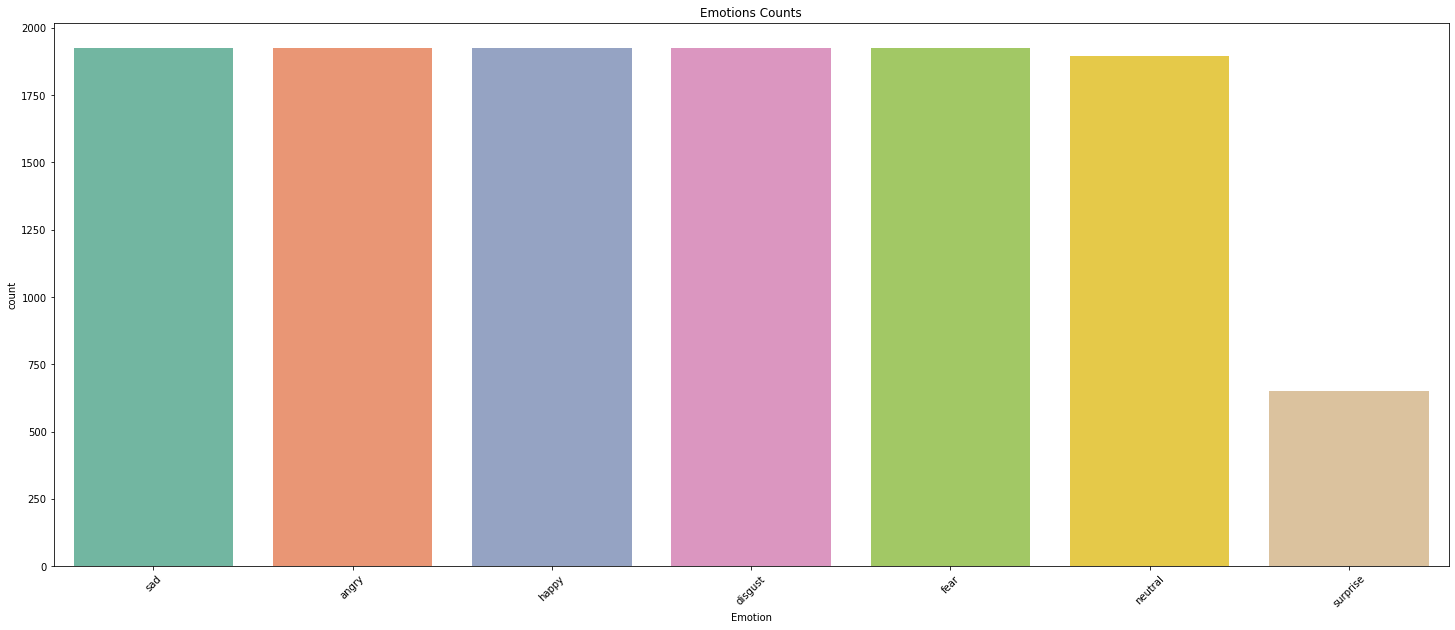

In [ ]:
# Emotion Counts
plt.figure(figsize=(25,10))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
emotion_names=main_df['Emotion'].unique()
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [ ]:
# Wave Plot
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

# Spectogram Plot
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

In audio engineering, we’re accustomed to seeing a **waveform** that displays changes in a signal’s amplitude over time. A **spectrogram**, however, displays changes in the frequencies in a signal over time. Amplitude is then represented on a third dimension with variable brightness or color. In audio engineering, we’re accustomed to seeing a waveform that displays changes in a signal’s amplitude over time. A spectrogram, however, displays changes in the frequencies in a signal over time. Amplitude is then represented on a third dimension with variable brightness or color.

This is why having a detailed spectrogram display is so important in audio editing: it helps to clearly display the problems that we might want to fix.

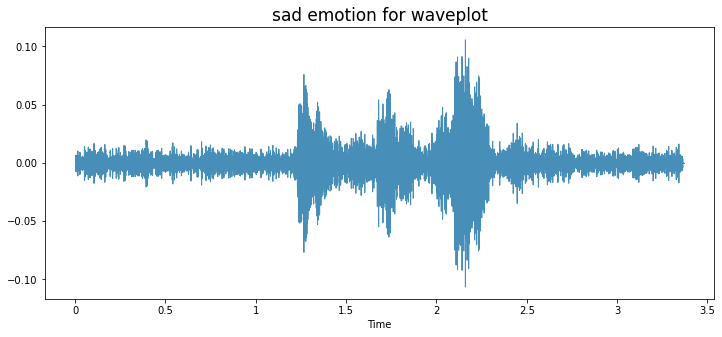

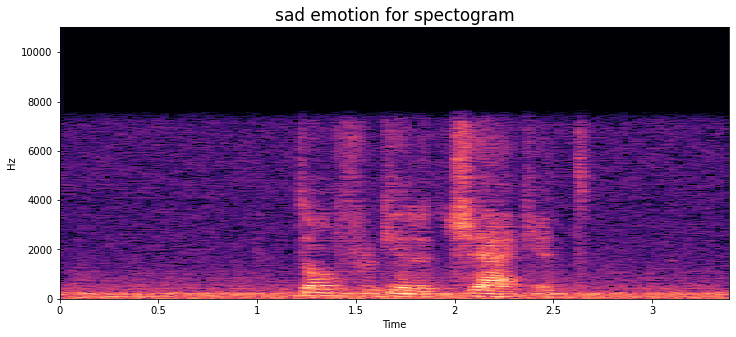

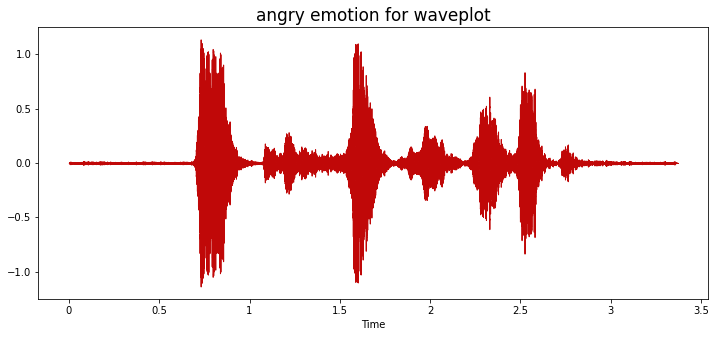

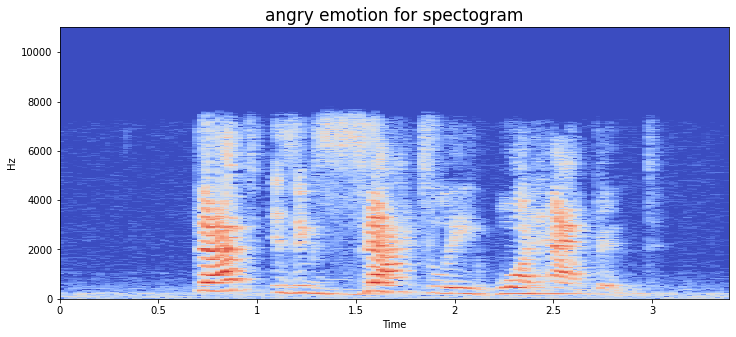

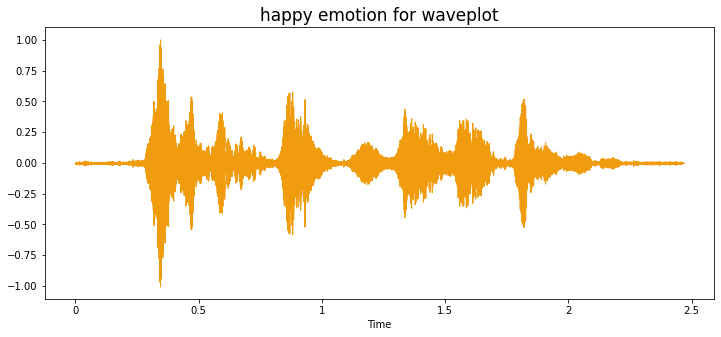

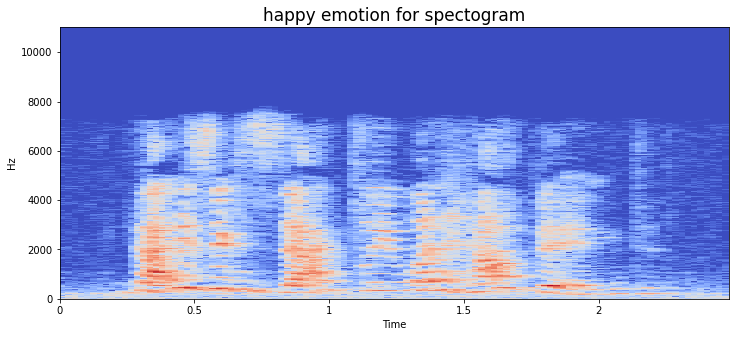

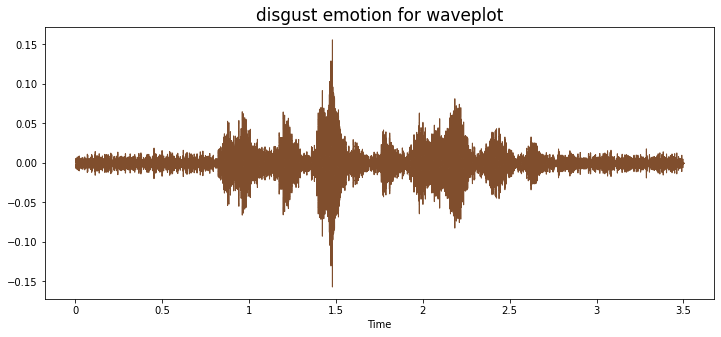

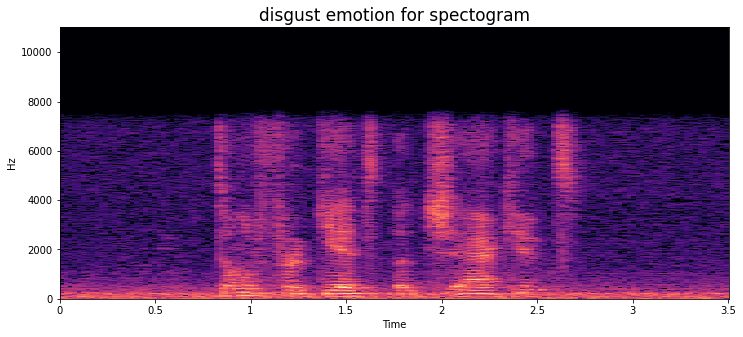

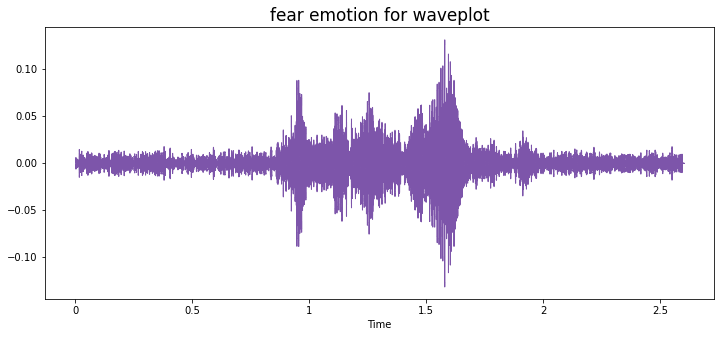

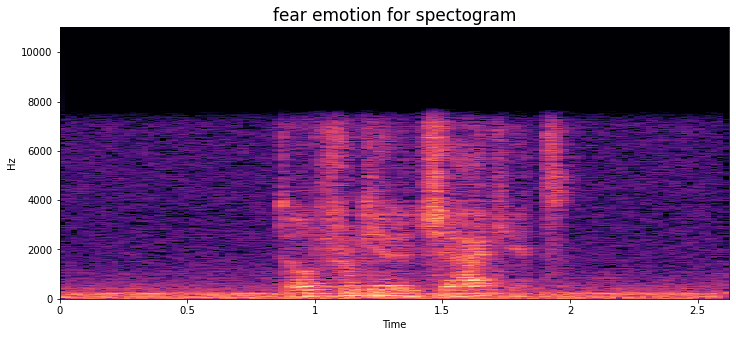

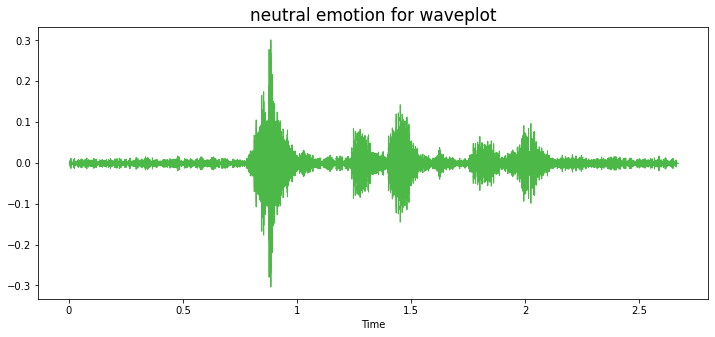

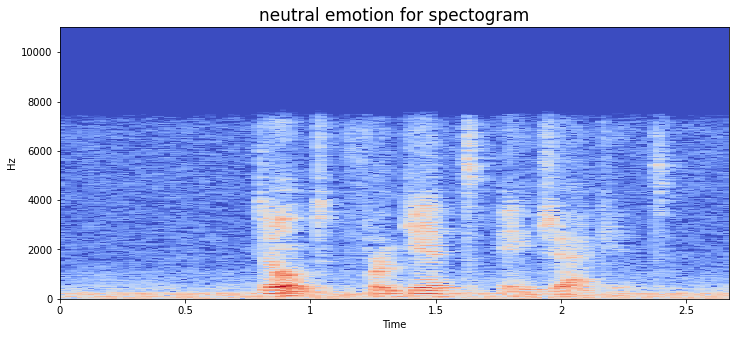

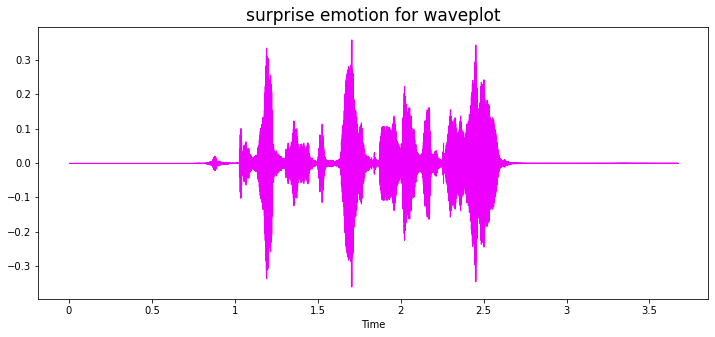

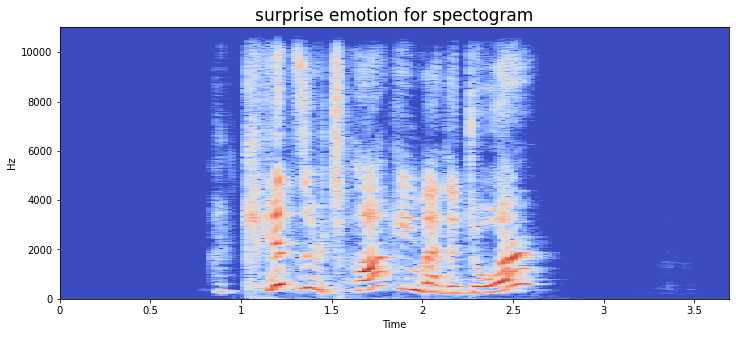

In [ ]:
# Iterative Plot
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

### Sample Each Emotion

In [ ]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample



In [ ]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[1])

Happy Audio Sample



In [ ]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample



In [ ]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[3])

Neutral Audio Sample



In [ ]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample



In [ ]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[5])

Angry Audio Sample



In [ ]:
print('Surprise Audio Sample\n')
IPython.display.Audio(audio_path[6])

Surprise Audio Sample



## Audio Augmentation

In [ ]:
# Add Noise
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

# Add Shifting
def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

# Add Pitching
def pitching(data,sr,pitch_factor=0.7,random=False):
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data,sr,pitch_factor)

# Add Streching
def streching(data,rate=0.8):
    return librosa.effects.time_stretch(data,rate)

Using a method known as data augmentation, you can create more data for your machine learning project. Data augmentation is a collection of techniques that manage the process of automatically generating high-quality data on top of existing data. otherwise, to generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed

**Noise** is unwanted sound considered unpleasant, loud or disruptive to hearing. **Shifting** is a sound recording technique in which the original audio of a sound is lefting or righting. Time **stretching** is the process of changing the speed or duration of an audio signal without affecting its pitch. Pitch scaling is the opposite: the process of changing the pitch without affecting the speed. **Pitch **shift is pitch scaling implemented in an effects unit and intended for live performance. Pitch control is a simpler process which affects pitch and speed simultaneously by slowing down or speeding up a recording. the value of this data is needed for the learning process.

In [ ]:
# Zero Crossing Rate
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)

# Root-Mean-Square-Energy
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)

# Mel-Frequency Cepstral Coefficients
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

**Zero-Crossing Rate (ZCR)** is the rate at which a signal changes from positive to zero to negative or from negative to zero to positive. Its value has been widely used in both speech recognition and music information retrieval, being a key feature to classify percussive sounds.
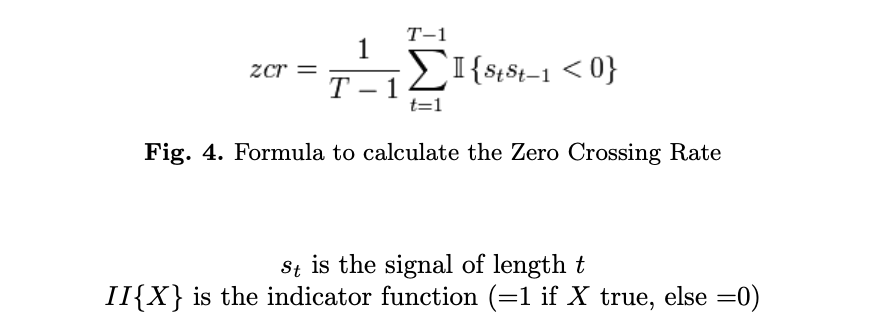

**Root-Mean-Square-Energy (RMSE)** or Standard deviation of residuals is used to detect voiced-unvoiced segments, aid in music onset detection, and discriminate between source types (music, environmental, speech). RMS is a useful method of computing the average of variables across time. When dealing with audio, the signal value (amplitude) is squared, averaged over time, and then the square root of the result is determined

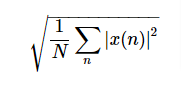
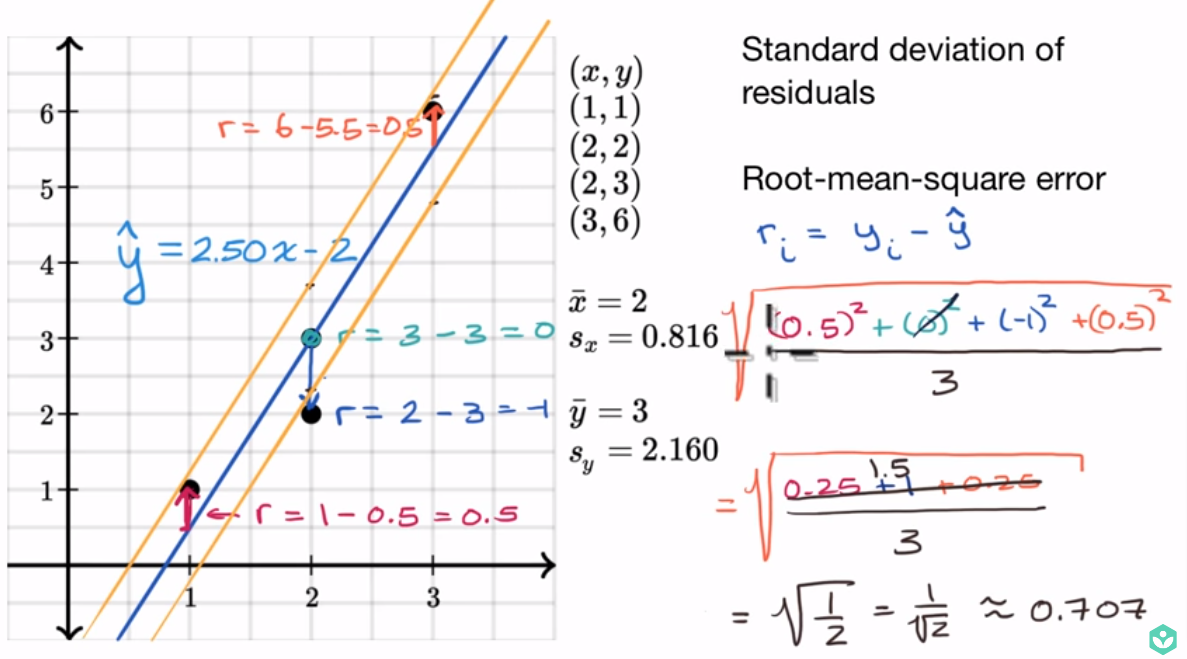

**Mel-Frequency Cepstrum (MFC)** is a representation of the short-term power spectrum of a sound, is used to perform feature extraction, a process that converts voice signals into several parameters.
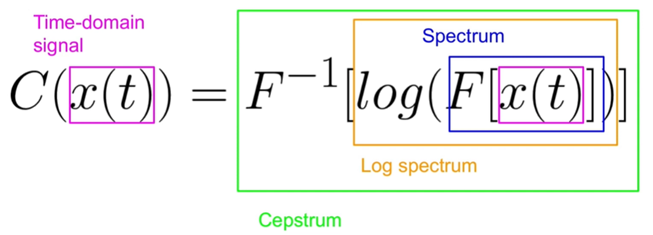
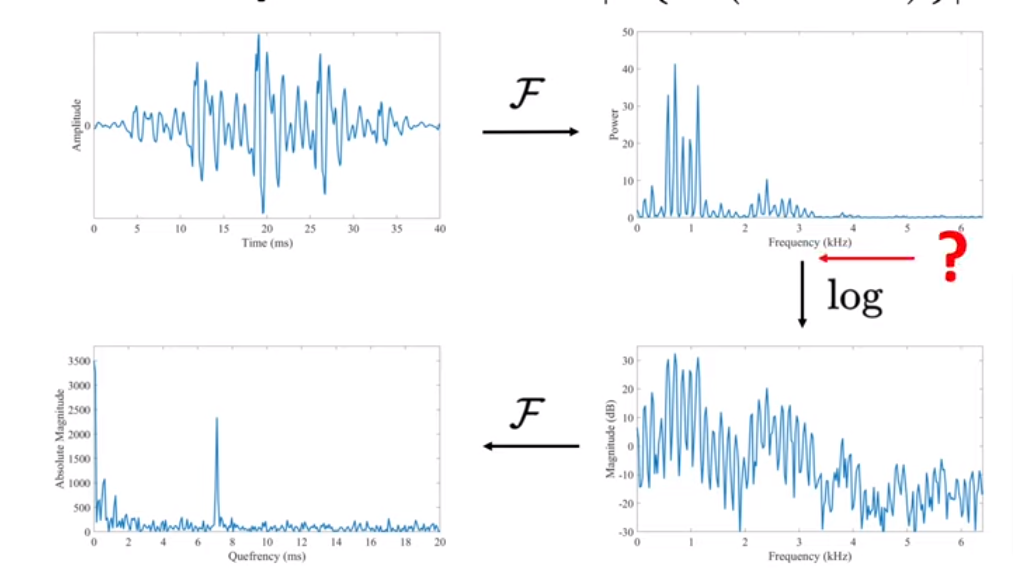
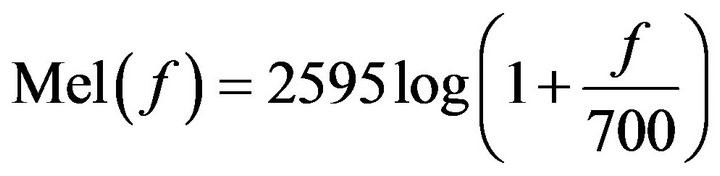
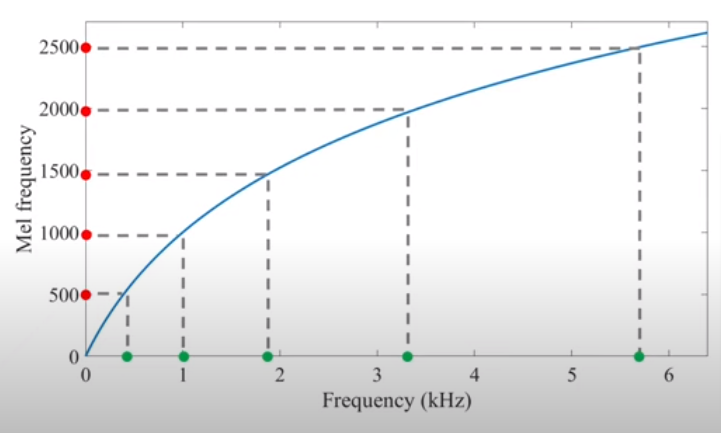

## Extract and Get Feature

In [ ]:
# Extract Features
def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

# Get Features
def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data,sr)
    audio=np.array(aud)
    
    noised_audio=add_noise(data,random=True)
    aud2=extract_features(noised_audio,sr)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitching(data,sr,random=True)
    aud3=extract_features(pitched_audio,sr)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitching(data,sr,random=True)
    pitched_noised_audio=add_noise(pitched_audio1,random=True)
    aud4=extract_features(pitched_noised_audio,sr)
    audio=np.vstack((audio,aud4))
    
    return audio

### Example Audio

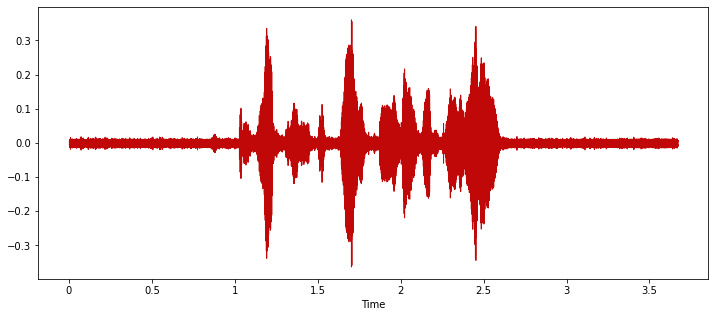

In [ ]:
# Noise
noised_audio=add_noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(noised_audio,sr,color='#C00808')
IPython.display.Audio(noised_audio,rate=sr)

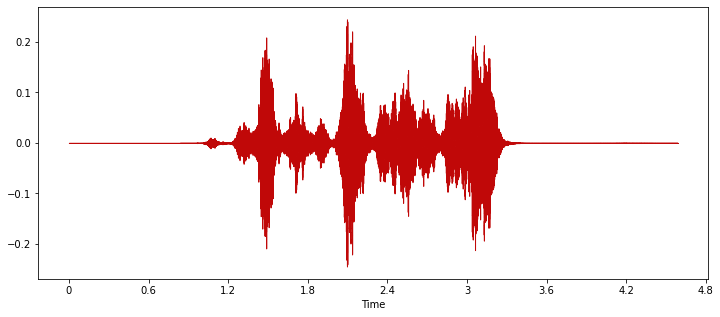

In [ ]:
# Streching
stretched_audio=streching(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(stretched_audio,sr,color='#C00808')
IPython.display.Audio(stretched_audio,rate=sr)

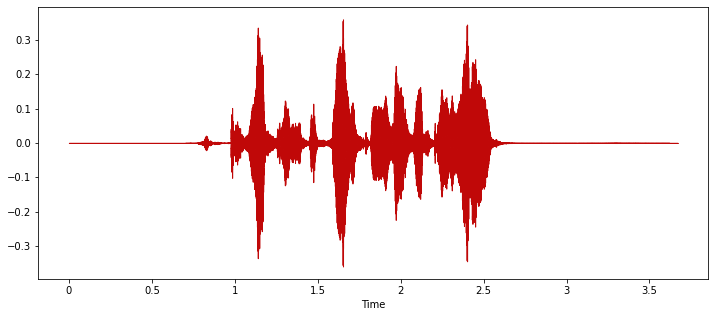

In [ ]:
# Shifting
shifted_audio=shifting(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(shifted_audio,sr,color='#C00808')
IPython.display.Audio(shifted_audio,rate=sr)

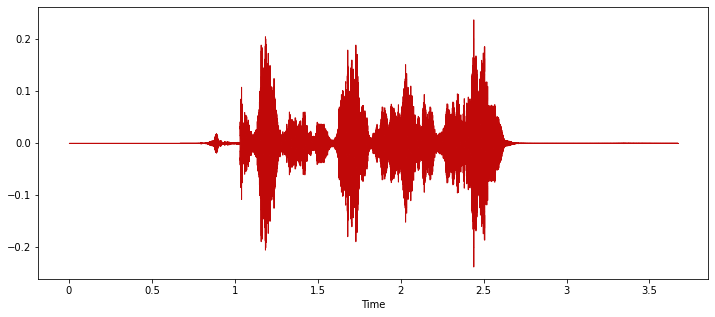

In [ ]:
# Pitching
pitched_audio=pitching(data,sr)
plt.figure(figsize=(12,5))
librosa.display.waveshow(pitched_audio,sr,color='#C00808')
IPython.display.Audio(pitched_audio,rate=sr)

## Processing 

In [ ]:
X,Y=[],[]
for path,emotion,index in zip(main_df.File_Path,main_df.Emotion,range(main_df.File_Path.shape[0])):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')

0 audio has been processed
500 audio has been processed
1000 audio has been processed
1500 audio has been processed
2000 audio has been processed
2500 audio has been processed
3000 audio has been processed
3500 audio has been processed
4000 audio has been processed
4500 audio has been processed
5000 audio has been processed
5500 audio has been processed
6000 audio has been processed
6500 audio has been processed
7000 audio has been processed
7500 audio has been processed
8000 audio has been processed
8500 audio has been processed
9000 audio has been processed
9500 audio has been processed
10000 audio has been processed
10500 audio has been processed
11000 audio has been processed
11500 audio has been processed
12000 audio has been processed
Done


### Export Processed Data

In [ ]:
processed_data_path = '/content/gdrive/MyDrive/Colab Notebooks/processed_data.csv'

In [ ]:
extract = pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

0         1         2         3         4         5         6  \
0  0.025879  0.037598  0.047852  0.039551  0.037109  0.031738  0.028809   
1  0.176270  0.252441  0.325195  0.295898  0.268066  0.239746  0.245605   
2  0.027344  0.039551  0.046875  0.035156  0.039062  0.031250  0.030273   
3  0.121094  0.182617  0.241211  0.244629  0.236328  0.225098  0.211426   
4  0.045898  0.065918  0.086914  0.079590  0.098633  0.112305  0.111328   
5  0.054688  0.074707  0.095703  0.080566  0.099609  0.112305  0.111328   
6  0.046875  0.066406  0.088379  0.080078  0.088867  0.096191  0.098633   
7  0.048340  0.070801  0.093750  0.084473  0.091309  0.097168  0.101074   
8  0.056152  0.069824  0.080078  0.065430  0.067871  0.111816  0.158203   
9  0.081543  0.110840  0.130859  0.118164  0.119141  0.163574  0.230957   

          7         8         9  ...      2367       2368      2369      2370  \
0  0.023926  0.031738  0.033691  ...       NaN        NaN       NaN       NaN   
1  0.239258  0.282227  0.306152  ...       NaN        NaN       NaN       NaN   
2  0.029297  0.028320  0.065918  ...       NaN        NaN       NaN       NaN   
3  0.185547  0.222168  0.241211  ...       NaN        NaN       NaN       NaN   
4  0.106445  0.087891  0.069336  ...  0.429977   3.768383 -4.763270  3.985855   
5  0.106445  0.087891  0.070312  ...  0.868666   1.520435 -1.149022 -2.097901   
6  0.100098  0.098633  0.088379  ...  2.651346  11.958472  0.786415  3.096900   
7  0.106445  0.104004  0.091309  ...  2.799647   0.829428 -1.829479  5.891101   
8  0.256836  0.256836  0.228516  ...       NaN        NaN       NaN       NaN   
9  0.331543  0.359375  0.321289  ...       NaN        NaN       NaN       NaN   

       2371      2372      2373      2374      2375  Emotion  
0       NaN       NaN       NaN       NaN       NaN     fear  
1       NaN       NaN       NaN       NaN       NaN     fear  
2       NaN       NaN       NaN       NaN       NaN     fear  
3       NaN       NaN       NaN       NaN       NaN     fear  
4 -5.522346 -2.578306 -3.737778 -4.995805 -3.164618  disgust  
5 -1.993604 -3.117164 -3.767806 -1.575510 -3.563422  disgust  
6 -6.143936  1.192289  0.856954 -4.904560 -4.245933  disgust  
7  2.444207 -0.952019 -3.360538  0.595256  0.272543  disgust  
8       NaN       NaN       NaN       NaN       NaN    happy  
9       NaN       NaN       NaN       NaN       NaN    happy  

[10 rows x 2377 columns]

## Analyzed Audio Features

In [ ]:
df=pd.read_csv(processed_data_path)
df.shape

(48648, 2377)

In [ ]:
# Replace NaN with 0
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(48648, 2377)

In [ ]:
df.head(5)

0         1         2         3         4         5         6  \
0  0.121094  0.187012  0.234863  0.244629  0.244629  0.239746  0.231445   
1  0.121094  0.188965  0.238770  0.249512  0.254395  0.251465  0.246094   
2  0.124512  0.173828  0.222656  0.236816  0.246094  0.251465  0.229980   
3  0.125488  0.176270  0.230469  0.250977  0.260254  0.280273  0.257812   
4  0.016113  0.021484  0.029297  0.030762  0.033691  0.036133  0.038574   

          7         8         9  ...  2367  2368  2369  2370  2371  2372  \
0  0.178711  0.123535  0.073730  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.195312  0.137207  0.083496  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.169434  0.107422  0.063965  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.195801  0.136230  0.078613  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.046875  0.054688  0.062500  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   2373  2374  2375  Emotion  
0   0.0   0.0   0.0  disgust  
1   0.0   0.0   0.0  disgust  
2   0.0   0.0   0.0  disgust  
3   0.0   0.0   0.0  disgust  
4   0.0   0.0   0.0    happy  

[5 rows x 2377 columns]

## Analyzed Data for Training

In [ ]:
X = df.drop(labels='Emotion',axis=1)
Y = df['Emotion']

In [ ]:
lb = LabelEncoder()
Y = np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Train, Test and Validation Spliting

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38918, 2376), (9730, 2376), (38918, 7), (9730, 7))

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 7), (9730, 7), (3892, 7))

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 7), (9730, 7), (3892, 7))

In [ ]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((35026, 2376, 1), (9730, 2376, 1), (3892, 2376, 1))

## Tuning for Training

In [ ]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
EPOCH=15
BATCH_SIZE=70

## Training

**Convolutional Neural Network (CNN)** are also known as Shift Invariant or Space Invariant Artificial Neural Networks (SIANN), based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation-equivariant responses known as feature maps.  Convolutional layers are the layers where filters are applied to the original image, or to other feature maps in a deep CNN. 

**Conv“1D”** means a convolution kernel is convolved with the input over 1D to produce outputs, it does not put any constraint to the input size dimension.

The **MaxPooling1D** layers are used for the max-pooling operation that reduces the dimensionality of each feature, which helps shorten training time and reduce number of parameters. For temporal data takes the max vector over the steps dimension.

To normalize the input layers, **using BatchNormalization** layers to adjust and scale the activations. Batch Normalization reduces the amount by what the hidden unit values shift around (covariance shift). Also, it allows each layer of a network to learn by itself a little bit more independently of other layers.

In [ ]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

**ReLU (Rectified Linear Unit)** The formula is deceptively simple: 𝑚𝑎𝑥(0,𝑧)max(0,z). That means, those neurons which go into that state will stop responding to variations in error/ input ( simply because gradient is 0, nothing changes )

**Softmax** use the function at last layer of neural network which calculates the probabilities distribution of the event over ’n’ different events. The main advantage of the function is able to handle multiple classes.
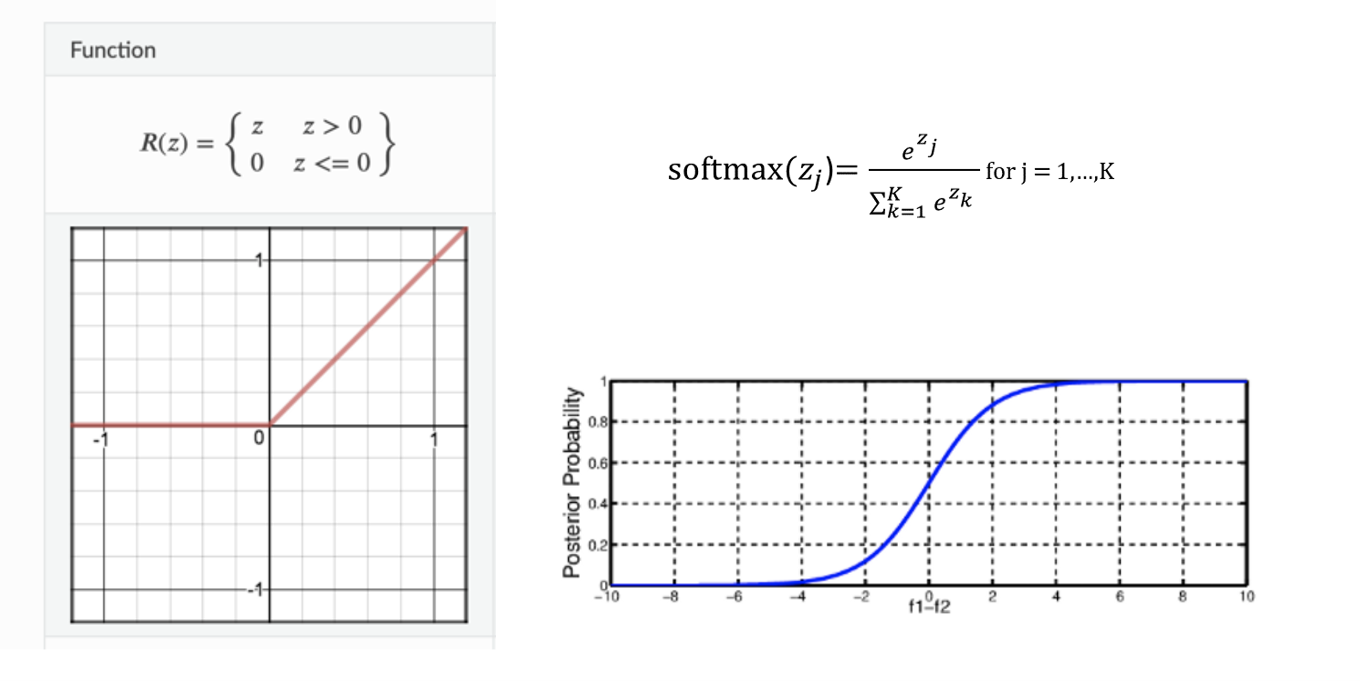

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (BatchN  (None, 2376, 512)        2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 1188, 512)        2048      
 hNormalization)                                                 
                                                        

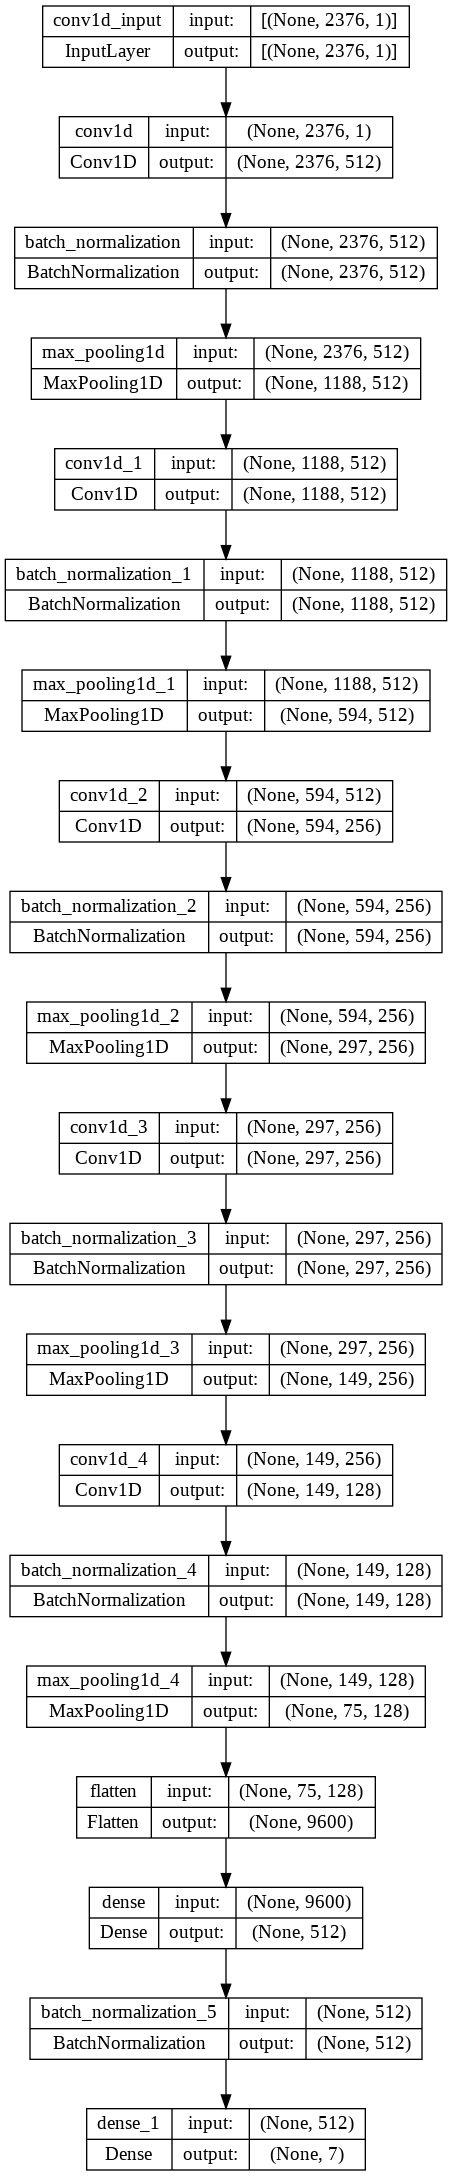

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/15
501/501 [==============================] - ETA: 0s - loss: 1.3796 - accuracy: 0.4794

501/501 [==============================] - 203s 382ms/step - loss: 1.3796 - accuracy: 0.4794 - val_loss: 1.5663 - val_accuracy: 0.3985 - lr: 0.0010
Epoch 2/15
501/501 [==============================] - ETA: 0s - loss: 1.0889 - accuracy: 0.5811

501/501 [==============================] - 188s 374ms/step - loss: 1.0889 - accuracy: 0.5811 - val_loss: 1.1157 - val_accuracy: 0.5876 - lr: 0.0010
Epoch 3/15
501/501 [==============================] - ETA: 0s - loss: 0.9563 - accuracy: 0.6341

501/501 [==============================] - 187s 374ms/step - loss: 0.9563 - accuracy: 0.6341 - val_loss: 1.3387 - val_accuracy: 0.5491 - lr: 0.0010
Epoch 4/15
501/501 [==============================] - ETA: 0s - loss: 0.8319 - accuracy: 0.6835

501/501 [==============================] - 187s 374ms/step - loss: 0.8319 - accuracy: 0.6835 - val_loss: 0.9676 - val_accuracy: 0.6349 - lr: 0.0010
Epoch 5/15
501/501 [==============================] - ETA: 0s - loss: 0.7040 - accuracy: 0.7366

501/501 [==============================] - 187s 373ms/step - loss: 0.7040 - accuracy: 0.7366 - val_loss: 0.8521 - val_accuracy: 0.6729 - lr: 0.0010
Epoch 6/15
501/501 [==============================] - ETA: 0s - loss: 0.5338 - accuracy: 0.8051

501/501 [==============================] - 187s 373ms/step - loss: 0.5338 - accuracy: 0.8051 - val_loss: 0.9501 - val_accuracy: 0.6853 - lr: 0.0010
Epoch 7/15
501/501 [==============================] - ETA: 0s - loss: 0.3936 - accuracy: 0.8609

501/501 [==============================] - 191s 382ms/step - loss: 0.3936 - accuracy: 0.8609 - val_loss: 0.5776 - val_accuracy: 0.7927 - lr: 0.0010
Epoch 8/15
501/501 [==============================] - ETA: 0s - loss: 0.2633 - accuracy: 0.9112

501/501 [==============================] - 187s 373ms/step - loss: 0.2633 - accuracy: 0.9112 - val_loss: 0.5681 - val_accuracy: 0.8094 - lr: 0.0010
Epoch 9/15
501/501 [==============================] - ETA: 0s - loss: 0.1659 - accuracy: 0.9460

501/501 [==============================] - 187s 373ms/step - loss: 0.1659 - accuracy: 0.9460 - val_loss: 0.4005 - val_accuracy: 0.8649 - lr: 0.0010
Epoch 10/15
501/501 [==============================] - ETA: 0s - loss: 0.1307 - accuracy: 0.9571

501/501 [==============================] - 187s 373ms/step - loss: 0.1307 - accuracy: 0.9571 - val_loss: 0.3709 - val_accuracy: 0.8805 - lr: 0.0010
Epoch 11/15
501/501 [==============================] - ETA: 0s - loss: 0.0829 - accuracy: 0.9741

501/501 [==============================] - 187s 373ms/step - loss: 0.0829 - accuracy: 0.9741 - val_loss: 0.3303 - val_accuracy: 0.8977 - lr: 0.0010
Epoch 12/15
501/501 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.9792

501/501 [==============================] - 187s 373ms/step - loss: 0.0677 - accuracy: 0.9792 - val_loss: 0.3441 - val_accuracy: 0.8936 - lr: 0.0010
Epoch 13/15
501/501 [==============================] - ETA: 0s - loss: 0.0832 - accuracy: 0.9730

501/501 [==============================] - 191s 381ms/step - loss: 0.0832 - accuracy: 0.9730 - val_loss: 0.5309 - val_accuracy: 0.8461 - lr: 0.0010
Epoch 14/15
501/501 [==============================] - ETA: 0s - loss: 0.0685 - accuracy: 0.9778

501/501 [==============================] - 187s 373ms/step - loss: 0.0685 - accuracy: 0.9778 - val_loss: 0.3427 - val_accuracy: 0.8923 - lr: 0.0010
Epoch 15/15
501/501 [==============================] - ETA: 0s - loss: 0.0792 - accuracy: 0.9742

501/501 [==============================] - 187s 373ms/step - loss: 0.0792 - accuracy: 0.9742 - val_loss: 0.6559 - val_accuracy: 0.8235 - lr: 0.0010


## Charts

**Loss** or  Training Loss is a metric used to assess how a deep learning model fits the training data.

**Accuracy** or Training Accuracy means that identical data are used both for training and testing

**Test Accurac**y represents that the trained model identifies independent data that were not used in training.

**Validation Loss** is a metric used to assess the performance of a deep learning model on the validation set.

**Validation Accuracy** is the accuracy you calculate on the data set you do not use for training

In [ ]:
# Accuracy Charts
fig=px.line(history.history,y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'Accuracy and Validation Accuracy Chart for each Epoch')
fig.show()

In [ ]:
# Loss Charts
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'Loss and Validation Loss Chart for each Epoch')
fig.show()

## Testing Model and Test Results

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

305/305 [==============================] - 14s 44ms/step


array([3, 3, 0, ..., 5, 4, 3])

In [ ]:
y_check=np.argmax(y_test,axis=1)
y_check

array([3, 3, 0, ..., 4, 4, 3])

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.6378492712974548
Test Accuracy: 0.8257964849472046


## Confusion Matrix

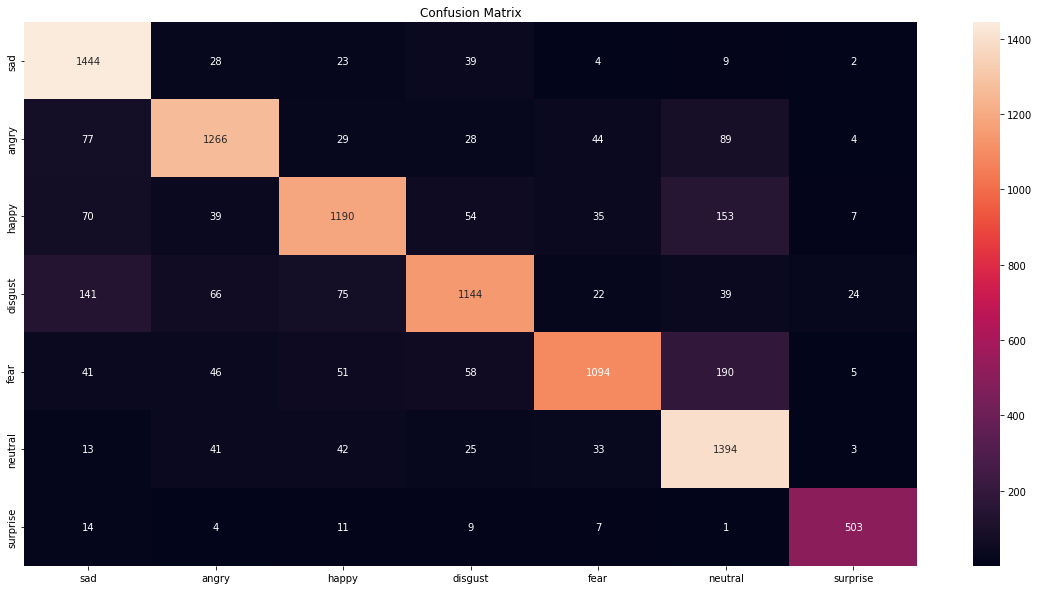

In [ ]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(20,10))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'Confusion Matrix')
plt.show()

In [ ]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

         sad       0.80      0.93      0.86      1549
       angry       0.85      0.82      0.84      1537
       happy       0.84      0.77      0.80      1548
     disgust       0.84      0.76      0.80      1511
        fear       0.88      0.74      0.80      1485
     neutral       0.74      0.90      0.81      1551
    surprise       0.92      0.92      0.92       549

    accuracy                           0.83      9730
   macro avg       0.84      0.83      0.83      9730
weighted avg       0.83      0.83      0.82      9730



## Save Model

In [ ]:
# SAave Model
model_path = "/content/gdrive/MyDrive/Colab Notebooks/res_model.h5"
model.save(model_path)